Deep learning images classification

In [33]:
# !pip install opencv-python


In [34]:
# !pip install opencv-python-headless


In [35]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os

Loading the given images 

In [36]:
os.getcwd()

'C:\\Users\\AMOS\\Desktop\\Deep learning practice models'

In [37]:
os.chdir(r'C:\Users\AMOS\Desktop\Deep learning practice models')

In [38]:
Img_height=120
Img_width=120

In [39]:
Img=image.load_img(r"C:\Users\AMOS\Desktop\Deep learning practice models\train\happy\1.jpg",
                   target_size=(Img_height, Img_width))

(np.float64(-0.5), np.float64(119.5), np.float64(119.5), np.float64(-0.5))

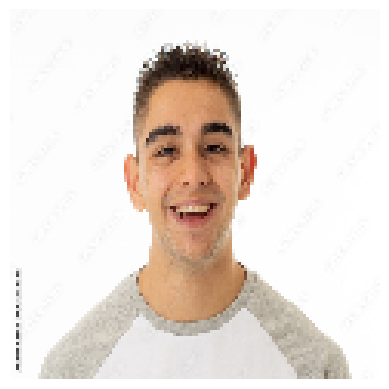

In [40]:
plt.imshow(Img)
plt.axis('off')


In [41]:
cv2.imread(r"C:\Users\AMOS\Desktop\Deep learning practice models\train\happy\1.jpg").shape

(808, 1000, 3)

In [42]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [43]:
train_data=train.flow_from_directory(
    r"C:\Users\AMOS\Desktop\Deep learning practice models\train",
    target_size=(120,120),
    batch_size=3,
    class_mode='binary'

) 
validation_data=train.flow_from_directory(
    r"C:\Users\AMOS\Desktop\Deep learning practice models\validation",
    target_size=(120,120),
    batch_size=3,
    class_mode='binary'

)                                    

Found 31 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [44]:
train_data.class_indices

{'Not_happy': 0, 'happy': 1}

In [46]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [48]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])


C:\Users\AMOS\annaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [51]:
model.fit(
    train_data,
    epochs=10,
    verbose=1
)


C:\Users\AMOS\annaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.5484 - loss: 1.6296
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.6129 - loss: 0.6775
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.6129 - loss: 0.6997
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.7097 - loss: 0.8139
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.7742 - loss: 0.4936
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9355 - loss: 0.2937
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.9355 - loss: 0.2854
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.9032 - loss: 0.2370
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 1.0000 - loss: 0.0823
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 1.0000 - loss: 0.0088


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    r"C:\Users\AMOS\Desktop\Deep learning practice models\test",  # Update this path to your test folder
    target_size=(120, 120),
    batch_size=3,
    class_mode='binary',
    shuffle=False
)


Found 31 images belonging to 2 classes.


In [54]:
model.evaluate(test_data)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 1.0000 - loss: 0.0042


[0.004165508784353733, 1.0]

In [65]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(r"C:\Users\AMOS\Desktop\Deep learning practice models\train\happy\2.jpg", target_size=(120, 120))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Prediction: [[0.9999563]]


In [66]:
model.save("happy_detector_model.h5")

In [67]:
history = model.fit(train_data, epochs=10, verbose=1)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 1.0000 - loss: 1.9592e-05
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 1.0000 - loss: 1.3028e-05
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 1.0000 - loss: 1.0944e-05
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - accuracy: 1.0000 - loss: 7.6205e-06
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 1.0000 - loss: 6.1171e-06
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 1.0000 - loss: 5.1152e-06
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 1.0000 - loss: 4.8011e-06
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 1.0000 - loss: 3.6791e-06
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 1.0000 - loss: 3.2277e-06
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 1.0000 - loss: 2.9489e-06


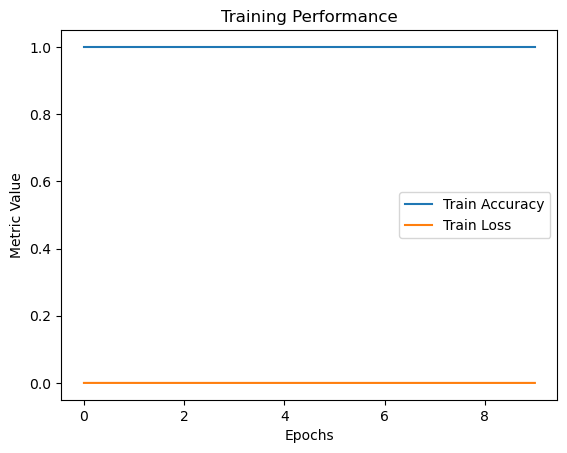

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.legend()
plt.title("Training Performance")
plt.xlabel("Epochs")
plt.ylabel("Metric Value")
plt.show()


In [72]:
from flask import Flask, request, jsonify
from keras.models import load_model
import numpy as np

app = Flask(__name__)
model = load_model('happy_detector_model.h5')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['input']
    prediction = model.predict(np.array(data))
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(port=5000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1

In [74]:
model.save("saved_model.keras")
